<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>Marketing Campaign Analysis </center></h1>

In [1]:
import numpy as np
from numpy import isnan
import pandas as pd
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from numpy import median
from numpy import std
from IPython.display import Image
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset=pd.read_csv('marketing_campaign.csv',header=0,sep=';') 
dataset

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

# 1. Data Preprocessing <a class="anchor" id="section_1"></a>

### A. Data types and data completeness <a class="anchor" id="section_1_1"></a>

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Insight :
>- We have __3 categorical variables__ and __26 numerical variables__
>- We have __missing values__ for the __*Income*__ variable

### B. Feature Engineering <a class="anchor" id="section_1_2"></a>

we could create several variables in order to better understand our dataset and reveal precious information:

>- Variable __*Age*__ in replacement of the variable *Year_birth*
>- Variable __*Spending*__ as the sum of the amount spent on the 6 product categories
>- Variable __*Marital_Situation*__ to group the different marital status in only 2 comprehensive categories : In couple vs Alone
>- Variable __*Has_child*__ as a binary variable equal to Yes if the customer has 1 child or more
>- Variable __*Educationnal_years*__ as the total number of years of education the individual achieved according to its diploma

In [4]:
dataset['Age']=2023-dataset['Year_Birth']
dataset['Spending']=dataset['MntWines']+dataset['MntFruits']+dataset['MntMeatProducts']+dataset['MntFishProducts']+dataset['MntSweetProducts']+dataset['MntGoldProds']
dataset['Transactions']=dataset['NumWebPurchases']+dataset['NumCatalogPurchases']+dataset['NumStorePurchases']
dataset['Marital_Situation']=dataset['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
dataset['Has_child'] = np.where(dataset.Kidhome+dataset.Teenhome > 0, 'Yes', 'No')
dataset['Educational_years']=dataset['Education'].replace({'Basic':5,'2n Cycle':8,'Graduation':12,'Master':18,'PhD':21})

dataset = dataset.drop(['Year_Birth', 'Marital_Status','Kidhome','Teenhome'], axis=1)

In [5]:
dataset.head(5)

ID   Education   Income Dt_Customer  Recency  MntWines  MntFruits  \
0  5524  Graduation  58138.0  2012-09-04       58       635         88   
1  2174  Graduation  46344.0  2014-03-08       38        11          1   
2  4141  Graduation  71613.0  2013-08-21       26       426         49   
3  6182  Graduation  26646.0  2014-02-10       26        11          4   
4  5324         PhD  58293.0  2014-01-19       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
0              546              172                88  ...         0   
1                6                2                 1  ...         0   
2              127              111                21  ...         0   
3               20               10                 3  ...         0   
4              118               46                27  ...         0   

   Z_CostContact  Z_Revenue  Response  Age  Spending  Transactions  \
0              3         11         1   66      1617            22   
1              3         11         0   69        27             4   
2              3         11         0   58       776            20   
3              3         11         0   39        53             6   
4              3         11         0   42       422            14   

   Marital_Situation  Has_child  Educational_years  
0              Alone         No                 12  
1              Alone        Yes                 12  
2          In couple         No                 12  
3          In couple        Yes                 12  
4          In couple        Yes                 21  

[5 rows x 31 columns]

### C. Statistical summary <a class="anchor" id="section_1_3"></a>

In [6]:
print("Summary of the last 2 years spending")
print("Number of transactions: ", dataset['Transactions'].sum())
print("Total sales: ",dataset['Spending'].sum())
print("Number of customers:", dataset['ID'].nunique())

Summary of the last 2 years spending
Number of transactions:  28083
Total sales:  1356988
Number of customers: 2240


In [7]:
pd.options.display.float_format = "{:.2f}".format
dataset.describe()

ID    Income  Recency  MntWines  MntFruits  MntMeatProducts  \
count  2240.00   2216.00  2240.00   2240.00    2240.00          2240.00   
mean   5592.16  52247.25    49.11    303.94      26.30           166.95   
std    3246.66  25173.08    28.96    336.60      39.77           225.72   
min       0.00   1730.00     0.00      0.00       0.00             0.00   
25%    2828.25  35303.00    24.00     23.75       1.00            16.00   
50%    5458.50  51381.50    49.00    173.50       8.00            67.00   
75%    8427.75  68522.00    74.00    504.25      33.00           232.00   
max   11191.00 666666.00    99.00   1493.00     199.00          1725.00   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count          2240.00           2240.00       2240.00            2240.00   
mean             37.53             27.06         44.02               2.33   
std              54.63             41.28         52.17               1.93   
min               0.00              0.00          0.00               0.00   
25%               3.00              1.00          9.00               1.00   
50%              12.00              8.00         24.00               2.00   
75%              50.00             33.00         56.00               3.00   
max             259.00            263.00        362.00              15.00   

       ...  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
count  ...       2240.00       2240.00   2240.00        2240.00    2240.00   
mean   ...          0.06          0.01      0.01           3.00      11.00   
std    ...          0.25          0.11      0.10           0.00       0.00   
min    ...          0.00          0.00      0.00           3.00      11.00   
25%    ...          0.00          0.00      0.00           3.00      11.00   
50%    ...          0.00          0.00      0.00           3.00      11.00   
75%    ...          0.00          0.00      0.00           3.00      11.00   
max    ...          1.00          1.00      1.00           3.00      11.00   

       Response     Age  Spending  Transactions  Educational_years  
count   2240.00 2240.00   2240.00       2240.00            2240.00  
mean       0.15   54.19    605.80         12.54              14.41  
std        0.36   11.98    602.25          7.21               4.51  
min        0.00   27.00      5.00          0.00               5.00  
25%        0.00   46.00     68.75          6.00              12.00  
50%        0.00   53.00    396.00         12.00              12.00  
75%        0.00   64.00   1045.50         18.00              18.00  
max        1.00  130.00   2525.00         32.00              21.00  

[8 rows x 27 columns]

The __*describe function*__ generates for us the 5-Number summary, particularly useful as a first step in our preliminary investigation. Analyzing the statistical summary gives us insightful information in one look : 
> - Average income is __52247 dollars__ while median income is  __51300 dollars__. The distribution is right skewed with the possible presence of outliers
     - The maximum value being equal to __666666 dollars__ and the 3rd quartile being only equal to __68522 dollars__ reinforce this hypothesis    
> - Average spending in the last 2 years is __600 dollars__ while median spending is __396 dollars__  
> - Average age is __54 years old__ and the oldest customer is 130 years old which is a pretty (and beautiful) rare event  
> - Average number of years of education is __14.4 years__ which corresponds to a Bachelor degree

### D. Handling outliers <a class="anchor" id="section_1_4"></a>

In [8]:
df = dataset[['Age','Income','Spending','Educational_years']]

fig = px.box(df.melt(), y="value", facet_col="variable",facet_col_wrap=2, boxmode="overlay", color="variable",height=1000, width=900)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=2, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')

fig.show()

Outliers analysis must be done with care. From above we can see that several variables seem to have outliers :
>- __*Age*__: 3 customers older than the Upper Fence set at 83 years old. We will remove them
>- __*Income*__ : Several value are greater than the Upper Fence of 113K. While having an income of 150k is not impossible, we will remove the customer who has an income of 666k (Moreover, this observation is defined as an extreme outlier based on our definition stated previously) 
>- __*Spending*__ : There is only one outlier which is at the limit of the Upper Fence. We will not remove it

In [9]:
#We remove the outlier in our dataset before handling missing values
dataset = dataset.drop(dataset[dataset['Income']> 600000].index).reset_index(drop=True)
dataset = dataset.drop(dataset[dataset['Age']> 83].index).reset_index(drop=True)
dataset

ID   Education   Income Dt_Customer  Recency  MntWines  MntFruits  \
0      5524  Graduation 58138.00  2012-09-04       58       635         88   
1      2174  Graduation 46344.00  2014-03-08       38        11          1   
2      4141  Graduation 71613.00  2013-08-21       26       426         49   
3      6182  Graduation 26646.00  2014-02-10       26        11          4   
4      5324         PhD 58293.00  2014-01-19       94       173         43   
...     ...         ...      ...         ...      ...       ...        ...   
2231  10870  Graduation 61223.00  2013-06-13       46       709         43   
2232   4001         PhD 64014.00  2014-06-10       56       406          0   
2233   7270  Graduation 56981.00  2014-01-25       91       908         48   
2234   8235      Master 69245.00  2014-01-24        8       428         30   
2235   9405         PhD 52869.00  2012-10-15       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
0                 546              172                88  ...         0   
1                   6                2                 1  ...         0   
2                 127              111                21  ...         0   
3                  20               10                 3  ...         0   
4                 118               46                27  ...         0   
...               ...              ...               ...  ...       ...   
2231              182               42               118  ...         0   
2232               30                0                 0  ...         0   
2233              217               32                12  ...         0   
2234              214               80                30  ...         0   
2235               61                2                 1  ...         0   

      Z_CostContact  Z_Revenue  Response  Age  Spending  Transactions  \
0                 3         11         1   66      1617            22   
1                 3         11         0   69        27             4   
2                 3         11         0   58       776            20   
3                 3         11         0   39        53             6   
4                 3         11         0   42       422            14   
...             ...        ...       ...  ...       ...           ...   
2231              3         11         0   56      1341            16   
2232              3         11         0   77       444            15   
2233              3         11         0   42      1241            18   
2234              3         11         0   67       843            21   
2235              3         11         1   69       172             8   

      Marital_Situation  Has_child  Educational_years  
0                 Alone         No                 12  
1                 Alone        Yes                 12  
2             In couple         No                 12  
3             In couple        Yes                 12  
4             In couple        Yes                 21  
...                 ...        ...                ...  
2231          In couple        Yes                 12  
2232          In couple        Yes                 21  
2233              Alone         No                 12  
2234          In couple        Yes                 18  
2235          In couple        Yes                 21  

[2236 rows x 31 columns]

### E. Handling missing values <a class="anchor" id="section_1_5"></a>

With our dataset, we will go for the last option and use the K-Nearest Neighbor Imputation.  
KNN Imputation works by __imputing the average income__ of the __k nearest neighbors__ found in the training set for each of the missing value.  
We will use *Education*, *Age* and *Income* to run the algorithm. KNNimputer will automatically normalize our data.

In [10]:
imputer = KNNImputer()
imputer = KNNImputer(n_neighbors=5,metric='nan_euclidean')
# fit on the dataset
imputer.fit(dataset[['Income','Age','Educational_years']])
# transform the dataset
X = imputer.transform(dataset[['Income','Age','Educational_years']])
Income_impute=pd.DataFrame(X,columns=['Income','Age','Educational_years'])
dataset['Income']=Income_impute['Income'].reset_index(drop=True)
count_nan = len(dataset) - dataset.count()
print(count_nan)

ID                     0
Education              0
Income                 0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Spending               0
Transactions           0
Marital_Situation      0
Has_child              0
Educational_years      0
dtype: int64


# 2. Exploratory Data Analysis <a class="anchor" id="section_2"></a>

* <h3>Spend category by marital situation<a class="anchor" id="section_2_2"></a>

In [11]:
# total spent according to maritalstatus
df = dataset[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", 'Marital_Situation']].groupby(["Marital_Situation"]).sum().reset_index().sort_values(by=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], ascending=False)

fig = px.bar(df, x='Marital_Situation', y=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"])
fig.update_layout(xaxis_title="Marital Situation", yaxis_title="Total Spent")
fig.update_layout(
    title={
        'text': "Spend category by marital situation",
        'y':0.95, 
        'x':0.5,  
        'xanchor': 'center',  
        'yanchor': 'top', 
    }
)
fig.show()

* <h3>Spend category by education<a class="anchor" id="section_2_2"></a>

In [12]:
# total spent according to Education
df = dataset[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", 'Education']].groupby(["Education"]).sum().reset_index().sort_values(by=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], ascending=False)

fig = px.bar(df, x='Education', y=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"])
fig.update_layout(xaxis_title="Education", yaxis_title="Total Spent")
fig.update_layout(
    title={
        'text': "Spend category by Education",
        'y':0.95, 
        'x':0.5,  
        'xanchor': 'center',  
        'yanchor': 'top', 
    }
)
fig.show()

* <h3>Purchase Type by Age <a class="anchor" id="section_2_2"></a>

In [13]:
#create Agetype column 
agetype = []
for i in dataset["Age"]:
    if i > 53:
        agetype.append("Elderly")
    else:
        agetype.append("Young and MiddleAge")
dataset["Agetype"] = agetype

# purchase type according to age
df = dataset[["Agetype", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].groupby(["Agetype"]).sum().reset_index().sort_values(by=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], ascending=False)

fig = px.bar(df, x="Agetype", y=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], 
             barmode="group", labels={"value": "Total", "variable": "Purchase Type"}, )

fig.update_layout(
    title={
        'text': "Purchase Type by Age",
        'y':0.95, 
        'x':0.5,  
        'xanchor': 'center',  
        'yanchor': 'top', 
    }
)
fig.show()

* <h3>Purchase Type by Education <a class="anchor" id="section_2_2"></a>

In [14]:
# purchase type according to Education
df = dataset[["Education", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].groupby(["Education"]).sum().reset_index().sort_values(by=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], ascending=False)

fig = px.bar(df, x="Education", y=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], 
             barmode="group", labels={"value": "Total", "variable": "Purchase Type"}, )

fig.update_layout(
    title={
        'text': "Purchase Type by Education",
        'y':0.95, 
        'x':0.5,  
        'xanchor': 'center',  
        'yanchor': 'top', 
    }
)
fig.show()

* <h3>Purchase Type by Marital_Situation <a class="anchor" id="section_2_2"></a>

In [15]:
# purchase type according to Marital_Situation
df = dataset[["Marital_Situation", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].groupby(["Marital_Situation"]).sum().reset_index().sort_values(by=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], ascending=False)

fig = px.bar(df, x="Marital_Situation", y=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], 
             barmode="group", labels={"value": "Total", "variable": "Purchase Type"}, )

fig.update_layout(
    title={
        'text': "Purchase Type by Marital_Situation",
        'y':0.95, 
        'x':0.5,  
        'xanchor': 'center',  
        'yanchor': 'top', 
    }
)
fig.show()

* <h3>Average income by diploma <a class="anchor" id="section_2_2"></a>

In [16]:
df = dataset[['Income','Education']]
category_orders={"Education":["Basic","2n Cycle","Graduation","Master","PhD"]}
fig = px.histogram(df, x="Education",y="Income",  histfunc='avg',category_orders=category_orders)
fig.update_layout(
    title={
        'text': "Average income by diploma",
        'y':0.95, 
        'x':0.5,  
        'xanchor': 'center',  
        'yanchor': 'top', 
    }
)
fig.show()

>- Average income is the highest for __PhD owners__ with __56062 dollars__  
>- Average income is the lowest for __Basic diploma owners__ with __20306 dollars__  
>- The better the diploma is, the higher the average salary  

* <h3>Average spending by diploma <a class="anchor" id="section_2_2"></a>

In [17]:
df = dataset[['Spending','Education']]
category_orders={"Education":["Basic","2n Cycle","Graduation","Master","PhD"]}
fig = px.histogram(df, x="Education",y="Spending",  histfunc='avg',category_orders=category_orders)
fig.update_layout(
    title={
        'text': "Average spending by diploma",
        'y':0.95, 
        'x':0.5,  
        'xanchor': 'center',  
        'yanchor': 'top', 
    }
)
fig.show()

* <h3>Diploma distribution by marital situation <a class="anchor" id="section_2_4"></a>

In [18]:
df = dataset[['Education','Marital_Situation']]

fig = px.sunburst(df, path=['Marital_Situation','Education'],color_discrete_sequence=px.colors.diverging.Spectral)
fig.update_layout(
    title={
        'text': "Diploma distribution by marital situation",
        'y':0.95, 
        'x':0.5,  
        'xanchor': 'center',  
        'yanchor': 'top', 
    }
)
fig.show()

>- The distribution of diploma category owned seems to be __identical__ for the two population _In couple_ and _Alone_ 

We could be tempted to believe that there is __no correlation__ between the diploma owned and the marital status  

* <h3>Income level by parental status <a class="anchor" id="section_2_5"></a>

In [19]:
#Creating 4 quartiles to segment Income
cut_labels_Income = ['Low income', 'low-Medium income', 'Medium-high income', 'High income']
dataset['Income_bins'] = pd.qcut(dataset['Income'], q=4,labels=cut_labels_Income)

df = dataset[['Income_bins','Has_child']]

fig = px.sunburst(df, path=['Has_child','Income_bins'],color_discrete_sequence=px.colors.diverging.Portland)
fig.update_layout(
    title={
        'text': "Income level by parental status",
        'y':0.95, 
        'x':0.5,  
        'xanchor': 'center',  
        'yanchor': 'top', 
    }
)
fig.show()

>- People with __high income__ are largely representing the population who has __no child__
>- People having __at least 1 child__ are mainly represented by people with __low income__  

We created here 4 segments to cluster individuals by their income level based on quartiles

We could be tempted to believe that having a high income tend to not have a child. 

* <h3>Spending level by parental status <a class="anchor" id="section_2_5"></a>

In [20]:
#Creating 4 quartiles to segment Spending
cut_labels_spending = ['Low spending', 'low-Medium spending', 'Medium-high spending', 'High spending']
dataset['spending_bins'] = pd.qcut(dataset['Spending'], q=4,labels=cut_labels_spending)

df = dataset[['spending_bins','Has_child']]

fig = px.sunburst(df, path=['Has_child','spending_bins'],color_discrete_sequence=px.colors.diverging.Portland)
fig.update_layout(
    title={
        'text': "Spending level by parental status",
        'y':0.95, 
        'x':0.5,  
        'xanchor': 'center',  
        'yanchor': 'top', 
    }
)
fig.show()

* <h3>Spending by Income<a class="anchor" id="section_2_3"></a>

In [21]:
df = dataset[['Income','Education']]
reg = LinearRegression().fit(np.vstack(dataset['Spending']), dataset['Income'])
df['bestfit'] = reg.predict(np.vstack(dataset['Spending']))

fig = go.Figure(data=go.Scatter(name='observations',x=dataset['Spending'], y=dataset['Income'],mode='markers'))
fig.add_trace(go.Scatter(name='line of best fit', x=dataset['Spending'], y=df['bestfit'], mode='lines'))
fig.update_traces(hovertemplate='Spending: %{x} <br>Income: %{y}')
fig.show()

>- Spending seems to be __positively correlated__ with the income level

# 3. Data Modeling <a class="anchor" id="section_2"></a>

In [22]:
data = dataset[['Education', 'Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain','Response','Age', 'Spending', 'Transactions', 'Marital_Situation', 'Has_child',
       'Educational_years']]
data = pd.get_dummies(data, columns=["Education", 'Marital_Situation', 'Has_child'])

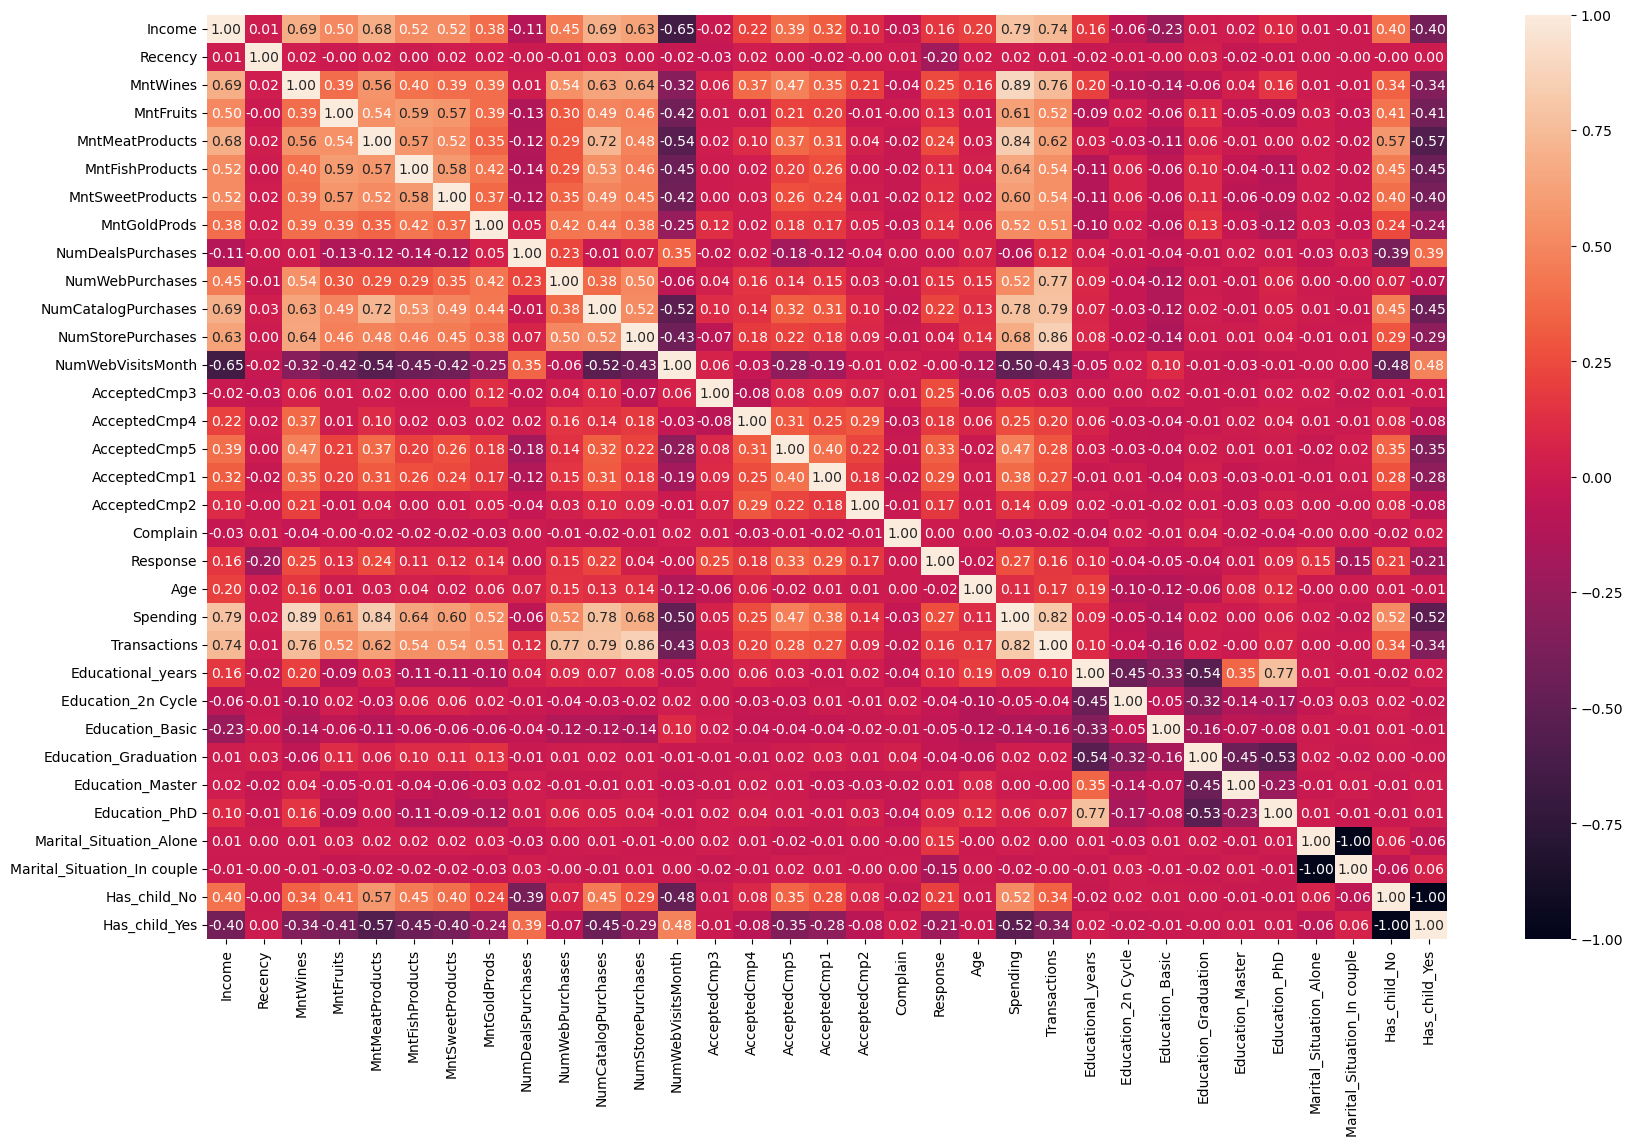

In [23]:
# lets check the correlation between variables through heatmap
corr = data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True,fmt='.2f')
plt.show()

## Supervised Learning

In [24]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

In [25]:
y = data.Response
X = data.drop('Response', axis=1)

In [26]:
data.head(5)

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0 58138.00       58       635         88              546              172   
1 46344.00       38        11          1                6                2   
2 71613.00       26       426         49              127              111   
3 26646.00       26        11          4               20               10   
4 58293.00       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                88            88                  3                8  ...   
1                 1             6                  2                1  ...   
2                21            42                  1                8  ...   
3                 3             5                  2                2  ...   
4                27            15                  5                5  ...   

   Educational_years  Education_2n Cycle  Education_Basic  \
0                 12                   0                0   
1                 12                   0                0   
2                 12                   0                0   
3                 12                   0                0   
4                 21                   0                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0              0   
2                     1                 0              0   
3                     1                 0              0   
4                     0                 0              1   

   Marital_Situation_Alone  Marital_Situation_In couple  Has_child_No  \
0                        1                            0             1   
1                        1                            0             0   
2                        0                            1             1   
3                        0                            1             0   
4                        0                            1             0   

   Has_child_Yes  
0              0  
1              1  
2              0  
3              1  
4              1  

[5 rows x 33 columns]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# Set up a logistic regression model with penalty="none" and solver="lbfgs"
logreg = LogisticRegression(penalty='none', solver="lbfgs")

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Compute the train score and test score
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)

# Compute the mean target value
mean_target = np.mean(y)

# Print the results
print("Train score:", train_score)
print("Test score:", test_score)
print("Mean target value:", mean_target)

Train score: 0.8658318425760286
Test score: 0.8264758497316637
Mean target value: 0.14937388193202147


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
# Predict the class labels for the test set
y_pred_lr = logreg.predict(X_test)

# Compute the confusion matrix, accuracy, precision, and recall
conf_matrix = confusion_matrix(y_test, y_pred_lr)
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
 [[451   9]
 [ 88  11]]
Accuracy: 0.8264758497316637
Precision: 0.55
Recall: 0.1111111111111111


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_fit = dtc.fit(X,y)

print('Train score',dtc_fit.score(X_train,y_train))

# prediction
pred_dtc = dtc_fit.predict(X_test)
results = pd.DataFrame(y_test)
results['DecisionTree'] = pred_dtc

# score
print('Test Score',accuracy_score(y_test,pred_dtc))
print('F1 Score: ',f1_score(y_test, pred_dtc))
confusion_matrix(y_test,pred_dtc)

Train score 0.9922480620155039
Test Score 0.9874776386404294
F1 Score:  0.9633507853403142


array([[460,   0],
       [  7,  92]])

## Unsupervised Learning

In [30]:
# for normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), columns= data.columns )

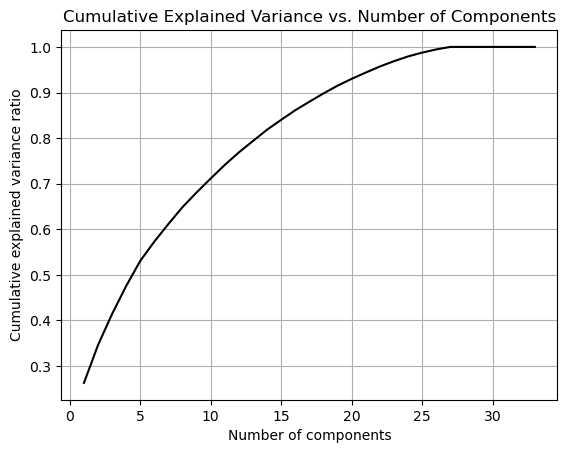

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=data.shape[1])
df_pca = pca.fit_transform(data)

plt.plot(range(1, data.shape[1]+1), pca.explained_variance_ratio_.cumsum(), 'k')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.title("Cumulative Explained Variance vs. Number of Components")
plt.grid()

In [32]:
pca = PCA(n_components=20)
df_pca = pca.fit_transform(data)

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

from sklearn.cluster import KMeans
for n_clusters in range(2, 9):
    km = KMeans(n_clusters=n_clusters)
    km.fit(df_pca)
    
    # Predict the cluster for each data point
    preds = km.predict(df_pca)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(df_pca, preds, metric='euclidean')
    score1 = davies_bouldin_score(df_pca, preds)
    print('For n_clusters = {}, the average silhouette_score is : {}, Davies Bouldin Score:{}'.format(n_clusters, score.round(5), score1.round(5)))

For n_clusters = 2, the average silhouette_score is : 0.24015, Davies Bouldin Score:1.77613
For n_clusters = 3, the average silhouette_score is : 0.17049, Davies Bouldin Score:2.11753
For n_clusters = 4, the average silhouette_score is : 0.12925, Davies Bouldin Score:2.22169
For n_clusters = 5, the average silhouette_score is : 0.13189, Davies Bouldin Score:2.21405
For n_clusters = 6, the average silhouette_score is : 0.14804, Davies Bouldin Score:1.97454
For n_clusters = 7, the average silhouette_score is : 0.14858, Davies Bouldin Score:2.0578
For n_clusters = 8, the average silhouette_score is : 0.18162, Davies Bouldin Score:1.76364


In [33]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(df_pca)

KMeans(n_clusters=2)

In [34]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
print(centroids)

   Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0   -0.58    -0.01     -0.57      -0.49            -0.57            -0.50   
1    0.92     0.02      0.91       0.78             0.90             0.80   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0             -0.48         -0.39               0.12            -0.39  ...   
1              0.77          0.62              -0.19             0.63  ...   

   Educational_years  Education_2n Cycle  Education_Basic  \
0              -0.05                0.02             0.09   
1               0.07               -0.03            -0.15   

   Education_Graduation  Education_Master  Education_PhD  \
0                 -0.03              0.02          -0.04   
1                  0.05             -0.04           0.06   

   Marital_Situation_Alone  Marital_Situation_In couple  Has_child_No  \
0                    -0.02                         0.02         -0.41   
1                     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Income'),
  Text(1, 0, 'Recency'),
  Text(2, 0, 'MntWines'),
  Text(3, 0, 'MntFruits'),
  Text(4, 0, 'MntMeatProducts'),
  Text(5, 0, 'MntFishProducts'),
  Text(6, 0, 'MntSweetProducts'),
  Text(7, 0, 'MntGoldProds'),
  Text(8, 0, 'NumDealsPurchases'),
  Text(9, 0, 'NumWebPurchases'),
  Text(10, 0, 'NumCatalogPurchases'),
  Text(11, 0, 'NumStorePurchases'),
  Text(12, 0, 'NumWebVisitsMonth'),
  Text(13, 0, 'AcceptedCmp3'),
  Text(14, 0, 'AcceptedCmp4'),
  Text(15, 0, 'AcceptedCmp5'),
  Text(16, 0, 'AcceptedCmp1'),
  Text(17, 0, 'AcceptedCmp2'),
  Text(18, 0, 'Complain'),
  Text(19, 0, 'Response'),
  Text(20, 0, 'Age'),
  Text(21, 0, 'Spending'),
  Text(22, 0, 'Transactions'),
  Text(23, 0, 'Educational_years'),
  Text(24, 0, 'Education_2n Cycle'),
  Text(25, 0, 'Education_Basic'),
  Text(26, 0, 'Education_Graduation'),
  Tex

<Figure size 2500x600 with 0 Axes>

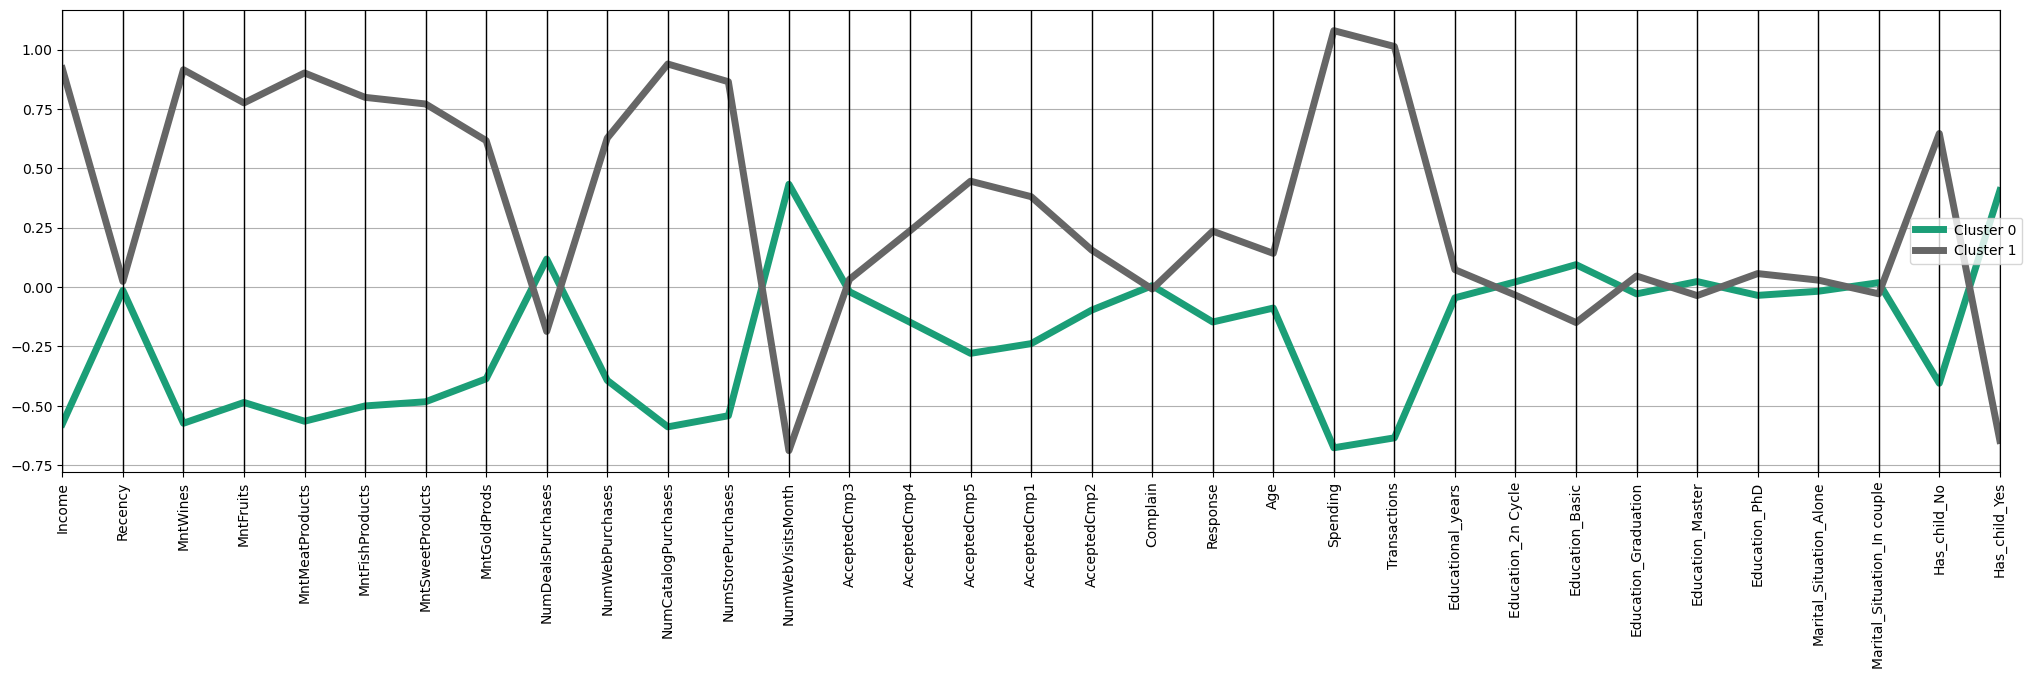

In [35]:
from pandas.plotting import parallel_coordinates
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig = plt.figure(figsize=(25, 6))
plt.figure(figsize=(25,6))

ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xticks(rotation=90)

# 4. RFM Segmentation <a class="anchor" id="section_3"></a>

In [36]:
import squarify
from lifetimes.plotting import * # pip install lifetimes can be activated this import
from lifetimes.utils import *

In [37]:
df_rfm = dataset[['Recency','Transactions','Spending']]

In [38]:
df_rfm.head(5)

Recency  Transactions  Spending
0       58            22      1617
1       38             4        27
2       26            20       776
3       26             6        53
4       94            14       422

In [39]:
df_rfm.columns = ['recency', 'frequency', 'monetary']

In [40]:
df_rfm.describe()

recency  frequency  monetary
count  2236.00    2236.00   2236.00
mean     49.12      12.55    605.99
std      28.96       7.21    601.87
min       0.00       0.00      5.00
25%      24.00       6.00     69.00
50%      49.00      12.00    396.50
75%      74.00      18.00   1045.50
max      99.00      32.00   2525.00

In [41]:
df_rfm["recency_score"] = pd.qcut(df_rfm["recency"], 5, labels=[5,4,3,2,1])
df_rfm["frequency_score"] = pd.qcut(df_rfm["frequency"], 5, labels=[1,2,3,4,5])
df_rfm["monetary_score"] = pd.qcut(df_rfm["monetary"], 5, labels=[1,2,3,4,5])

In [42]:
df_rfm["RF_SCORE"] = (df_rfm["recency_score"].astype(str) + df_rfm["frequency_score"].astype(str))

In [43]:
# We are able to control 55 score
df_rfm[df_rfm["RF_SCORE"] == '55']

recency  frequency  monetary recency_score frequency_score  \
27         19         27       637             5               5   
51          2         28      1693             5               5   
67         19         31      1274             5               5   
84         18         26       778             5               5   
188        14         23      1581             5               5   
...       ...        ...       ...           ...             ...   
2084        6         22      1518             5               5   
2091        5         22       874             5               5   
2182        8         24      1016             5               5   
2198        0         22       704             5               5   
2234        8         21       843             5               5   

     monetary_score RF_SCORE  
27                4       55  
51                5       55  
67                5       55  
84                4       55  
188               5       55  
...             ...      ...  
2084              5       55  
2091              4       55  
2182              4       55  
2198              4       55  
2234              4       55  

[71 rows x 7 columns]

In [44]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [45]:
df_rfm['segment'] = df_rfm['RF_SCORE'].replace(seg_map, regex=True)

In [46]:
df_rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep        49.30   192      5.26   192    79.95   192
at_Risk               78.42   360     15.29   360   886.06   360
cant_loose            79.85   157     23.35   157  1305.81   157
champions              9.37   168     20.44   168  1124.15   168
hibernating           80.27   366      5.40   366    82.34   366
loyal_customers       39.77   346     20.45   346  1170.66   346
need_attention        50.10    79     12.59    79   581.33    79
new_customers          9.53   111      4.03   111    44.56   111
potential_loyalists   18.90   346     10.12   346   394.33   346
promising             29.89   111      3.99   111    38.65   111

In [56]:
df_rfm.head(5)

recency  frequency  monetary recency_score frequency_score monetary_score  \
0       58         22      1617             3               5              5   
1       38          4        27             4               1              1   
2       26         20       776             4               4              4   
3       26          6        53             4               2              1   
4       94         14       422             1               3              3   

  RF_SCORE              segment  average_order_value  purchase_frequency  
0       35      loyal_customers                73.50                0.01  
1       41            promising                 6.75                0.00  
2       44      loyal_customers                38.80                0.01  
3       42  potential_loyalists                 8.83                0.00  
4       13              at_Risk                30.14                0.01

In [47]:
df_segment = df_rfm.groupby('segment').count().reset_index()

In [48]:
df_segment

segment  recency  frequency  monetary  recency_score  \
0       about_to_sleep      192        192       192            192   
1              at_Risk      360        360       360            360   
2           cant_loose      157        157       157            157   
3            champions      168        168       168            168   
4          hibernating      366        366       366            366   
5      loyal_customers      346        346       346            346   
6       need_attention       79         79        79             79   
7        new_customers      111        111       111            111   
8  potential_loyalists      346        346       346            346   
9            promising      111        111       111            111   

   frequency_score  monetary_score  RF_SCORE  
0              192             192       192  
1              360             360       360  
2              157             157       157  
3              168             168       168  
4              366             366       366  
5              346             346       346  
6               79              79        79  
7              111             111       111  
8              346             346       346  
9              111             111       111

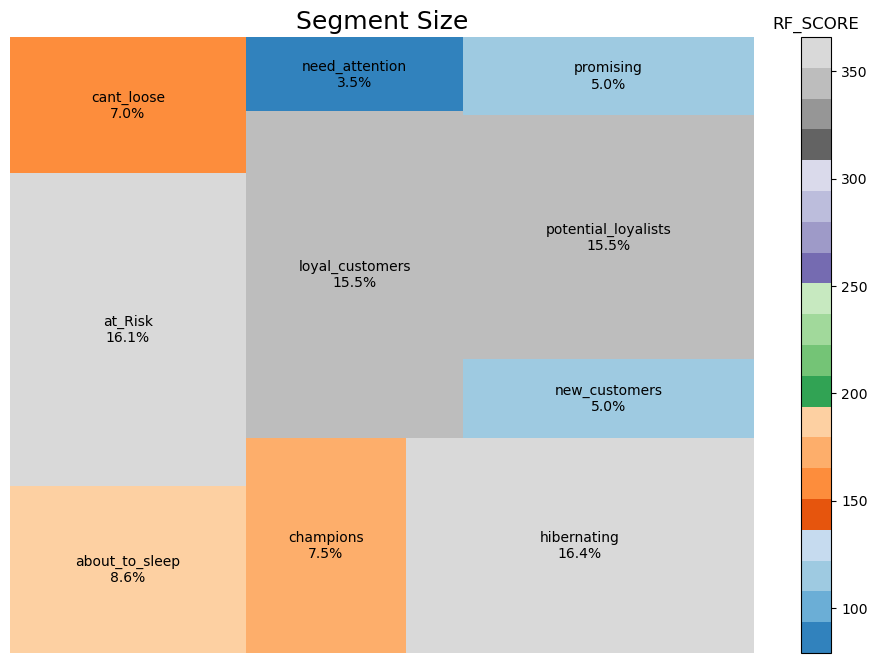

In [49]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import squarify

cmap = plt.cm.tab20c

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Segment Size', fontsize=18)

sizes = df_segment['RF_SCORE']
labels = [f"{label}\n{size/sum(sizes)*100:.1f}%" for label, size in zip(df_segment['segment'], sizes)]

mini = min(sizes)
maxi = max(sizes)
norm = mcolors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sizes]

squarify.plot(sizes=sizes, label=labels, alpha=1, color=colors)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(sizes)
cbar = plt.colorbar(sm)
cbar.ax.set_title('RF_SCORE')

plt.axis('off')
plt.box(False)
plt.show()


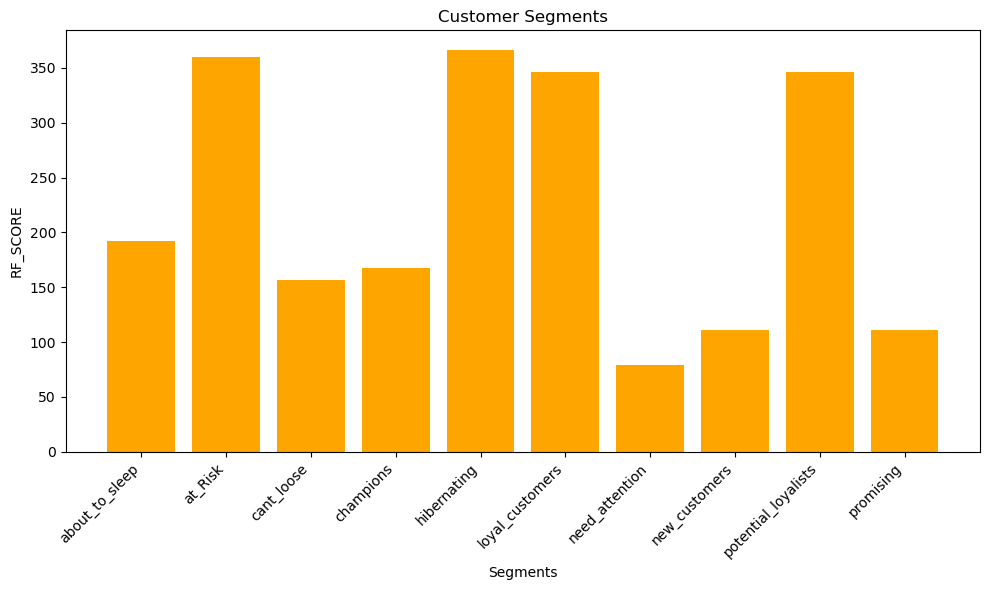

In [50]:
import matplotlib.pyplot as plt

segments = ['about_to_sleep', 'at_Risk', 'cant_loose', 'champions', 'hibernating', 'loyal_customers', 'need_attention', 'new_customers', 'potential_loyalists', 'promising']
scores = [192, 360, 157, 168, 366, 346, 79, 111, 346, 111]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(segments, scores, color='orange')

ax.set_title('Customer Segments')
ax.set_xlabel('Segments')
ax.set_ylabel('RF_SCORE')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


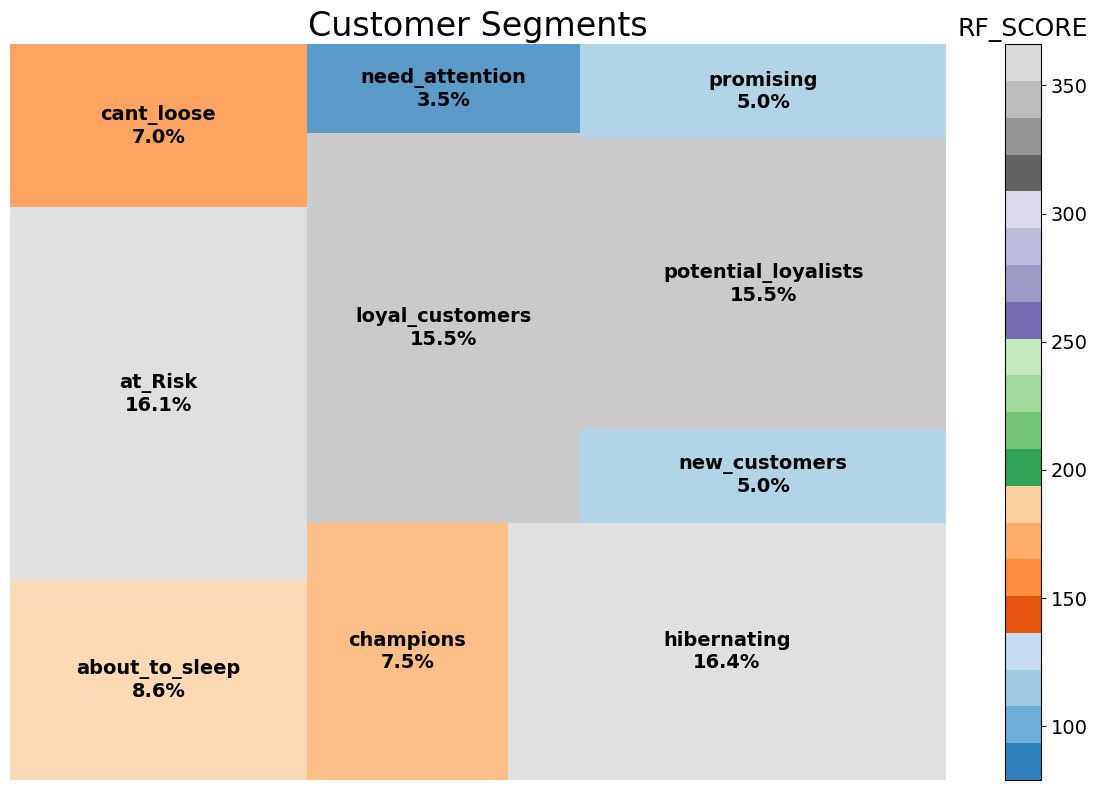

In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import squarify

# Define color map
cmap = plt.cm.tab20c

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(12, 8))

# Set title and font size
ax.set_title('Customer Segments', fontsize=24)

# Define segment sizes and labels
sizes = df_segment['RF_SCORE']
labels = [f"{label}\n{size/sum(sizes)*100:.1f}%" for label, size in zip(df_segment['segment'], sizes)]

# Define color scale and assign colors to segments
mini = min(sizes)
maxi = max(sizes)
norm = mcolors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sizes]

# Generate plot using squarify library
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors, text_kwargs={'fontsize':14, 'fontweight':'bold'})

# Add color bar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(sizes)
cbar = plt.colorbar(sm)
cbar.ax.set_title('RF_SCORE', fontsize=18)
cbar.ax.tick_params(labelsize=14)


# Remove axis ticks and spines
plt.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()


# 5.Business metrics
<a id=cltv> </a>

#### 1) Average Order Value (average_order_value = total_price / total_transaction)

In [69]:
# 按照 segment 分组计算平均订单价值
df_segment_avg_order_value = df_rfm.groupby("segment")["monetary", "frequency"].apply(lambda x: x["monetary"].sum() / x["frequency"].sum()).reset_index(name="average_order_value")
df_segment_avg_order_value


segment  average_order_value
0       about_to_sleep                15.20
1              at_Risk                57.94
2           cant_loose                55.92
3            champions                55.00
4          hibernating                15.24
5      loyal_customers                57.23
6       need_attention                46.16
7        new_customers                11.06
8  potential_loyalists                38.98
9            promising                 9.68

#### 2) Purchase Frequency (total_transaction / total_number_of_customers)

In [53]:
df_rfm["purchase_frequency"] = df_rfm["frequency"] / df_rfm.shape[0]

In [65]:
# 按照 segment 分组计算 Purchase Frequency
df_segment_purchase_frequency = df_rfm.groupby("segment").agg(total_transaction=("frequency", "sum"), total_number_of_customers=("segment", "count")).reset_index()
df_segment_purchase_frequency["purchase_frequency"] = df_segment_purchase_frequency["total_transaction"] / df_segment_purchase_frequency["total_number_of_customers"]
df_segment_purchase_frequency.drop(["total_transaction", "total_number_of_customers"], axis=1, inplace=True)


In [66]:
df_segment_purchase_frequency

segment  purchase_frequency
0       about_to_sleep                5.26
1              at_Risk               15.29
2           cant_loose               23.35
3            champions               20.44
4          hibernating                5.40
5      loyal_customers               20.45
6       need_attention               12.59
7        new_customers                4.03
8  potential_loyalists               10.12
9            promising                3.99

#### 3) Repeat Rate & Churn Rate(repeat_rate = (number of customers who make two or more purchases / total number of customers) x 100%)(churn_rate = (number of customers who do not make any purchases / total number of customers) x 100%)

In [58]:
df_rfm['repeat_rate'] = df_rfm[df_rfm["frequency"] > 1].shape[0] /df_rfm.shape[0]
churn_rate = 1 - repeat_rate


In [70]:
# 按照 segment 分组计算 Repeat Rate 和 Churn Rate
df_segment_repeat_churn_rate = df_rfm.groupby("segment").agg(total_customers=("segment", "count"), repeat_customers=("frequency", lambda x: sum(x > 1)), churn_customers=("frequency", lambda x: sum(x == 0))).reset_index()
df_segment_repeat_churn_rate["repeat_rate"] = df_segment_repeat_churn_rate["repeat_customers"] / df_segment_repeat_churn_rate["total_customers"] * 100
df_segment_repeat_churn_rate["churn_rate"] = df_segment_repeat_churn_rate["churn_customers"] / df_segment_repeat_churn_rate["total_customers"] * 100
df_segment_repeat_churn_rate.drop(["total_customers", "repeat_customers", "churn_customers"], axis=1, inplace=True)


In [71]:
df_segment_repeat_churn_rate 

segment  repeat_rate  churn_rate
0       about_to_sleep        98.96        0.52
1              at_Risk       100.00        0.00
2           cant_loose       100.00        0.00
3            champions       100.00        0.00
4          hibernating        98.36        0.82
5      loyal_customers       100.00        0.00
6       need_attention       100.00        0.00
7        new_customers        99.10        0.00
8  potential_loyalists       100.00        0.00
9            promising        97.30        1.80

In [72]:
# 合并三个 DataFrame
df_combined = pd.merge(df_segment_average_order_value, df_segment_purchase_frequency, on="segment")
df_combined = pd.merge(df_combined, df_segment_repeat_churn_rate, on="segment")


In [73]:
df_combined

segment  average_order_value  purchase_frequency  repeat_rate  \
0       about_to_sleep                15.20                5.26        98.96   
1              at_Risk                57.94               15.29       100.00   
2           cant_loose                55.92               23.35       100.00   
3            champions                55.00               20.44       100.00   
4          hibernating                15.24                5.40        98.36   
5      loyal_customers                57.23               20.45       100.00   
6       need_attention                46.16               12.59       100.00   
7        new_customers                11.06                4.03        99.10   
8  potential_loyalists                38.98               10.12       100.00   
9            promising                 9.68                3.99        97.30   

   churn_rate  
0        0.52  
1        0.00  
2        0.00  
3        0.00  
4        0.82  
5        0.00  
6        0.00  
7        0.00  
8        0.00  
9        1.80